In [ ]:
# install mnist dataset for train model
!pip install python-mnist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras import backend as K

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# define cnn model class
class SudokuNet:
  def build(width, height, depth, classes):
    inputShape = (height, width, depth)

    model = Sequential()

    # Convolution layer and Pooling layer
    model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=inputShape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

		# Fully-connected layer
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

		# Softmax classifier
    model.add(Dense(classes, activation='softmax'))

    return model

In [ ]:
# preprocess training data
# Set hyperparameters
learningRate = 1e-3
epoch = 10
batchSize = 128

# Load MNIST dataset
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Grayscale
trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
testData = testData.reshape((testData.shape[0], 28, 28, 1))

# Scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

# One-hot encoding
lb = LabelBinarizer()
trainLabels = lb.fit_transform(trainLabels)
testLabels = lb.transform(testLabels)

In [ ]:
# train model
# Optimizer
opt = Adam(learning_rate = learningRate)


model = SudokuNet.build(width=28, height=28, depth=1, classes=10)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
# Fit model
history = model.fit(trainData, trainLabels,
                    validation_data=(testData, testLabels),
                    batch_size = batchSize,
                    epochs = epoch,
                    verbose = 1)

Epoch 1/10
469/469 [==============================] - 14s 6ms/step - loss: 0.7118 - acc: 0.7648 - val_loss: 0.1017 - val_acc: 0.9715
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2571 - acc: 0.9258 - val_loss: 0.0654 - val_acc: 0.9813
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1963 - acc: 0.9438 - val_loss: 0.0545 - val_acc: 0.9830
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1647 - acc: 0.9539 - val_loss: 0.0486 - val_acc: 0.9857
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1421 - acc: 0.9600 - val_loss: 0.0400 - val_acc: 0.9879
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1320 - acc: 0.9626 - val_loss: 0.0414 - val_acc: 0.9873
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1171 - acc: 0.9651 - val_loss: 0.0375 - val_acc: 0.9883
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0

In [ ]:
# create function for show accuracy
def show_result(history): 
    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['acc'][-1])
    print('Last validation accuracy: %s'%history.history['val_acc'][-1])

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    epochs = range(1, len(loss) + 1)

    # Define a subplot 
    fig, axs = plt.subplots(1,2,figsize=(15,4))

    # Plot loss
    loss_plot = axs[0]

    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()

    # Plot accuracy
    acc_plot = axs[1]

    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

Last train accuracy: 0.9703999757766724
Last validation accuracy: 0.9878000020980835


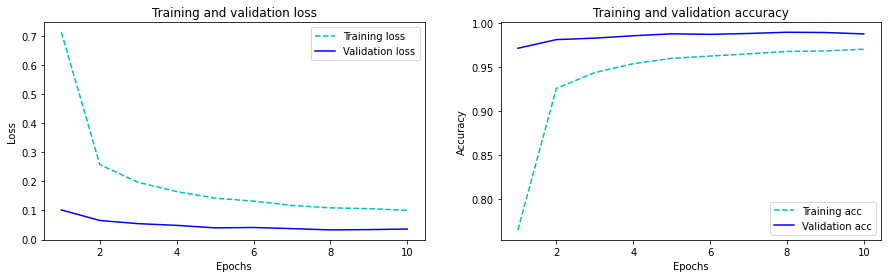

In [ ]:
show_result(history)

In [ ]:
# Evaluate
prediction = model.predict(testData)

print(classification_report(testLabels.argmax(axis=1),
                      prediction.argmax(axis=1),
                      target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Save model
model.save('/content/drive/MyDrive/Colab Notebooks/CSS496/model.h5')

In [ ]:
# unzip unseen data
!unzip '/content/drive/MyDrive/Colab Notebooks/CSS496/data/digits_training_large.zip'

In [ ]:
# preprocessing unseen data
unseen = '/content/digits_training_large'

unseen_gen = ImageDataGenerator(rescale=1./255) 
unseen_data = unseen_gen.flow_from_directory(unseen,
                                          target_size=(28,28),
                                          batch_size=32,
                                          class_mode="categorical",
                                          color_mode='grayscale',
                                          shuffle=False)

Found 2907 images belonging to 10 classes.


In [ ]:
# create function for evaluation
def evaluation_imgdatagen_report(model, generator):
 
 labels = generator.labels
 # Calculate result
 result = model.evaluate(generator,verbose=False)
 
 # Predict and convert into a class
 pred_class = model.predict(generator).argmax(axis=1)
 #labels = labels
 # Show report
 print(confusion_matrix(labels,pred_class))
 print(classification_report(labels,pred_class))
 print("Loss: %s Accuracy: %s" %(result[0],result[1]))
 
 return pred_class

In [ ]:
evaluation_imgdatagen_report(model, unseen_data)

[[284   0   0   0   1   1   4   6   0   0]
 [  1  78  19 149   2   3   0   3  15   1]
 [  1   0 201   1   0   0   0  11   1   0]
 [  0   0   0 296   0   1   0   0   0   0]
 [  0   2   4   0 211   0  33   0   2   4]
 [  0   0   0   0   0 544   3   0   0   0]
 [  0   0   0   0   0  57 219   0   2   0]
 [  0   3  46   2   0   0   0 200   0   0]
 [  3   0   1   0   0   1  10   0 227   0]
 [ 20   1   1  51  29  47  11   3  21  70]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       296
           1       0.93      0.29      0.44       271
           2       0.74      0.93      0.83       215
           3       0.59      1.00      0.74       297
           4       0.87      0.82      0.85       256
           5       0.83      0.99      0.91       547
           6       0.78      0.79      0.78       278
           7       0.90      0.80      0.84       251
           8       0.85      0.94      0.89       242
           9       0.93     

array([0, 0, 0, ..., 3, 9, 3])